# Assignment 2

Due Wed, Feb 23, 23:59am, commited to your `phys248` repo on the Abacus GitLab server. 

## Problem 1

### 1.1
Create a python function that takes `x` as an input and returns the function value 
$$f(x) =  x^2 \sin(x^4)
$$ 
for $x\in[0.25,2]$. 
Using this function create a bar plot with 20 rectangles according to the midpoint rule. Also add a line plot of $f(x)$ with an array for plotting `xp` that has 200 points.


In [ ]:
%pylab ipympl

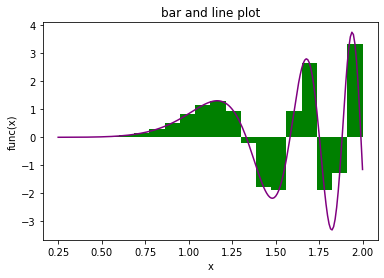

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

x = np.linspace(0.25, 2, 21)
dx = 1.75/20

def func(x):
    return (x**2)*np.sin(x**4)

# create bar plot using midpoint rule
x_mid = (x[:-1]+x[1:])/2
y_mid = func(x_mid)
plt.bar(x_mid, y_mid, dx, color='green')
# add a line plot with 200 points
xp = np.linspace(0.25, 2, 201)
plt.xlabel('x')
plt.ylabel('func(x)')
plt.title('bar and line plot')
plt.plot(xp, func(xp), '-', color='purple')
plt.show()

### 1.2
* Calculate the area under the curve by numerical integration using the midpoint rule. 
* Create a function `intf` that takes the function name as well as the number of grid cells and the integration x range `(xmin,xmax)` as a tuple as arguments and returns the integral of the function in the given range using the midpoint rule. Add to the function and optional argument that allows you to specify the precision with which the operations are carried out so that the returned answer has the specified floating point precision. 
* Check your midpoint integration function using a sufficiently large number of grid cells by comparing against two intergrationn functions, for example from the Scipy library.


In [13]:
def intf(func, n, xVal):
    dx = (xVal[1]-xVal[0])/(n-1)
    x = np.linspace(xVal[0]+dx/2, xVal[1]-dx/2, n)
    area = np.sum(func(x)*dx)
    return area

n = 161
xVal = (0.25, 2)
#intf(func, n, xVal)
print('numerical integration with {} grid cells: {}\n'.format(n, intf(func, n, xVal)))

numerical integration with 161 grid cells: 0.4063376116180129



### 1.3
Investigate the convergence behaviour of this integration. 
* Calculate the integral for different numbers of rectangles $N$ with $\log_{10} N \in[2, 3, \dots 7]$ using 32-bit floats. Use the function `intf` from 1.2.
* Make a double logarithmic plot of the magnitude of the difference of subsequent results (the difference of the integral for $N+1$ and for $N$) as a function of $N$.
* Add to the plot the case for 16, and 64 bit floats.
* Interpret the plot by describing the regime that is dominated by lack of accuracty vs lack of precision.

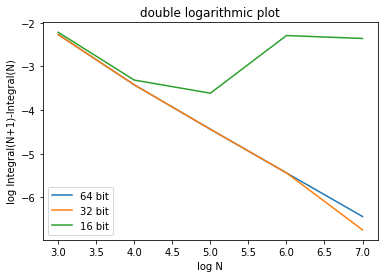

In [13]:
# code
import numpy as np
import matplotlib.pyplot as plt

logN = np.arange(2, 8, 1)
n = np.zeros(6)
integral = np.zeros(6)

for i in range(6):
    n[i] = 10**(i+2)

def func(x):
    return (x**2)*np.sin(x**4)
    
def intf(func, n: int, xVal, dtype) -> float:
    dx = (xVal[1]-xVal[0])/(n-1)
    x = np.linspace(float(xVal[0]+dx/2), float(xVal[1]-dx/2), int(n), dtype=dtype)
    area = np.sum(func(x)*dx)
    return area

# calculate integral of different size n with different bit float
bit = 64
info = ''
for j in range(3):
    diff = []
    for i in range(len(n)):
        if bit == 64:
            integral[i] = (intf(func, int(n[i]), (0.25, 2), 'float64'))
            info = '64 bit'
        elif bit == 32:
            integral[i] = (intf(func, int(n[i]), (0.25, 2), 'float32'))
            info = '32 bit'
        elif bit == 16:
            integral[i] = (intf(func, int(n[i]), (0.25, 2), 'float16'))
            info = '16 bit'
    for i in range(1, len(n)):
        diff.append(abs(integral[i]-integral[i-1]))
    plt.plot(logN[1:], np.log10(diff), label=info)
    bit /= 2   
    
# create double logarithmic plot
plt.xlabel('log N')
plt.ylabel('log Integral(N+1)-Integral(N)')
plt.title('double logarithmic plot')
plt.legend()
plt.show()

Text answer: The reason for the lack of accuracy and precision is primarily due to the floating bits we have used. For example, if we reduce the floating number to lower bits, the floating number will be rounded while truncating the insignificant bits on the right.

### 1.4
Before proceeding save your notebook. Your kernel could crash when doing the next part.

Try get the most accurate and precise answer using the function `intf`. What is required to get an accurate answer and what parameter do you need to change to get a precise answer? What is limiting the function to get a more exact (= accurate and precise) answer? Try to be as explicit as possible. For example, quantify the limitation!

In [2]:
# code
import numpy as np

def func(x):
    return (x**2)*np.sin(x**4)

def intf(func, n, xVal):
    dx = (xVal[1]-xVal[0])/(n-1)
    x = np.linspace(xVal[0]+dx/2, xVal[1]-dx/2, n)
    area = np.sum(func(x)*dx)
    return area

# the largest n values we can use before kernal being crashed
intf(func, 10**7, (0.25, 2))

0.403147273846211

Text answer: The larger the n values that's closer to infinity, the more time it will take to compute the integral. That being said, larger n values can limit the function to obtain a more exact answer.

# quantify limits ...
as n -> infinity, we obtain the exact integral of the function.

More text answer?

## Problem 2

### 2.1
The [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function) is given by 
$$
f(x) = a e^{-\frac{(x-b)^2}{2c^2}}
$$

Write a function `fv` that calculates $f(x)$ for the default parameter values `a=c=1` and `b=0` for $x \in [-3,5]$. Use an array `x` for $x$ that divides the range into 70 equal intervals. 

Use the function to make a plot with the following cases:

name of y array | parameters
----------------|------------
`fv1` | default parameters
`fv2` | default parameters but $a=0.75$
`fv3` | default parameters but $b=1.25$
`fv4` | default parameters but $c=1.5$

Provide all elements required for a line plots, such as a legend for each line and axis labels. Use a different line style and color for each line. Briefly describe the meaning of each parameter.

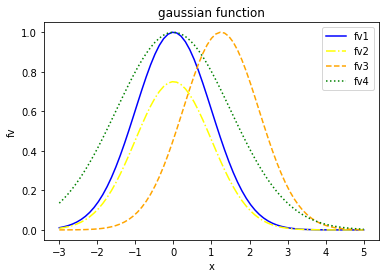

In [35]:
# code
import numpy as np
import matplotlib.pyplot as plt

def fv(a, b, c, x):
    return a*(np.e**((-1*(x-b)**2)/(2*c**2)))
   
plt.xlabel('x')
plt.ylabel('fv')
plt.title('gaussian function')
    
x = np.linspace(-3, 5, 71)
fv1 = fv(1, 0, 1, x)
plt.plot(x, fv1, linestyle='-', color='blue', label='fv1')
fv2 = fv(0.75, 0, 1, x)
plt.plot(x, fv2, linestyle='-.', color='yellow', label='fv2')
fv3 = fv(1, 1.25, 1, x)
plt.plot(x, fv3, linestyle='--', color='orange', label='fv3')
fv4 = fv(1, 0, 1.5, x)
plt.plot(x, fv4, linestyle=':', color='green', label='fv4')
plt.legend()
plt.show()

Text answer: 
a parameter: the height of the curve peak (factor of the gaussian function)
b parameter: the location of the center of the curve's peak 
c parameter: the standard deviation of the curve

### 2.2
Without using a loop
1. Find $x$ values `xmax1` and `xmax3` for which the arrays `fv1` and `fv3` have a maximum.
2. Find the $x$ values for which the values of array `fv3` are larger than `fv2` and smaller than `fv1`.

In [50]:
import numpy as np

def fv(a, b, c, x):
    return a*(np.e**((-1*(x-b)**2)/(2*c**2)))

x = np.linspace(-3, 5, 71)
fv1 = fv(1, 0, 1, x)
fv3 = fv(1, 1.25, 1, x)

# find xmax1 and xmax3 part 1
ind1 = np.where(fv1 == np.max(fv1))
ind3 = np.where(fv3 == np.max(fv3))

xmax1 = x[ind1]
xmax3 = x[ind3]
print('xmax1: {} xmax3: {}\n'.format(xmax1, xmax3))

# part 2
fv2 = fv(0.75, 0, 1, x)
temp1 = np.where(fv3[0:]<fv1[0:])
temp2 = np.where(fv3[0:]>fv2[0:])
ind2 = np.intersect1d(temp1, temp2)
print('x values where fv3 < fv1 and fv3 > fv2: {}'.format(x[ind2]))

xmax1: [-0.02857143] xmax3: [1.22857143]

x values where fv3 < fv1 and fv3 > fv2: [0.42857143 0.54285714]


### 2.3
Given the function:
$$ z(x,y) = x^4 \sin y$$
Use a $(x,y)$ grid of $40\times40$ equal rectangles with $x \in [1.5,3.7]$ and $y \in [-3.2,4.8]$.

1. Make a surface plot
2. Make an image of the $z$ array

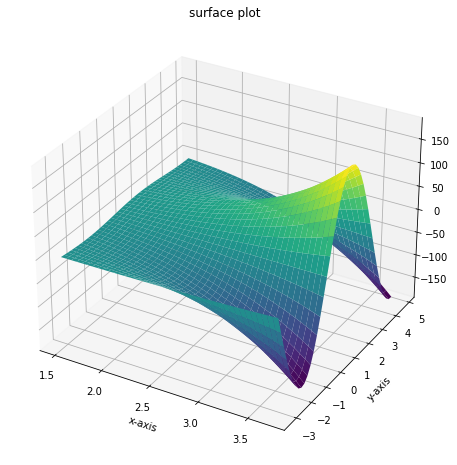

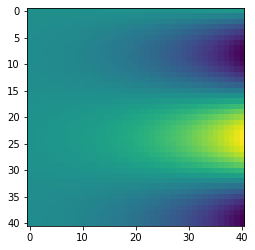

In [9]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

x = np.linspace(1.5, 3.7, 41)
y = np.linspace(-3.2, 4.8, 41)

def z(x, y):
    return (x**4)*np.sin(y)

# create a surface plot
X, Y = np.meshgrid(x, y)
zVal = z(X, Y)
plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, zVal, cmap='viridis')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('surface plot')
plt.show()

# make an image of the z array
plt.imshow(zVal)
plt.show()

### 2.4
Create a plot of the two-dimensional Gaussian function
$$
h(x,y) = \exp{-(x^2 + y^2)}
$$
for $x \in [-1,1.2]$ and $y \in [-1,1.5]$ divided into a grid of $50\times50$ equal rectangles. 
Do both a 
1. 3D surface plot
2. Contour plot with labels

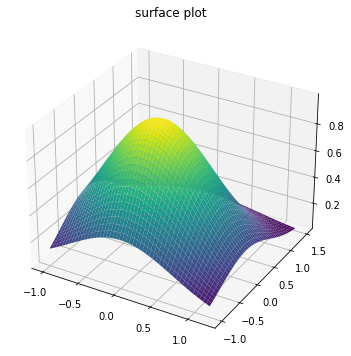

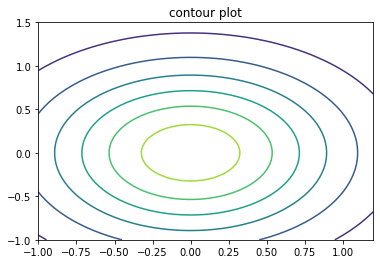

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1.2, 50)
y = np.linspace(-1, 1.5, 50)

def h(x, y):
    return np.e**(-1*(x**2+y**2))

# create a 3D surface plot
X, Y = np.meshgrid(x, y)
z = h(X, Y)
plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, z, cmap='viridis')
plt.title('surface plot')
plt.show()

# create a contour plot with labels
plt.contour(X, Y, z)
plt.title('contour plot')
plt.show()

## Problem 3
In this problem you will program a random walk in two dimensions and explore its properties. A two-dimensional random walk is the result of making random steps in both x- and y-directions. 

Tip: Start the program developement for very small parameters of number of steps and walks and check your results every step. Built you program out of small elements, one expression and one line at a time, each of which you check. This will save you time later  when you otherwise have a hard time finding bugs. Avoid loops!

### 3.1 

Generate a data set that represents $n=10000$ random steps in the $(x,y)$ - plane. The random walk starts at $(x_0,y_0) = (0,0)$. Each of the following $n$ steps will advance by $\Delta x$ and $\Delta y$, each of which is either $+ 0.5$ or $-0.5$. Make a plot of the random walk by representing the position at each of the $n$ steps with a square marker in which the color represents the step number. 


Text(0.5, 1.0, 'random walk')

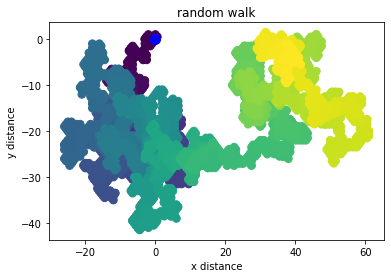

In [5]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

n = 10000 # number of random steps
x = np.zeros(n)
y = np.zeros(n)
colors = np.zeros(n)

for i in range(1, n):
    dx = random.randint(0, 2)-0.5
    dy = random.randint(0, 2)-0.5
    x[i] = x[i-1]+dx
    y[i] = y[i-1]+dy
    colors[i] = i

plt.scatter(x, y, s = 60, c = colors, cmap = 'viridis')
plt.scatter(x[0], y[0], s=100, color = 'blue')

plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('random walk')

### 3.2 

Make $n_\mathrm{walk} = 1000$  walks of length $n=10000$.  
* Each time save an array with the distance of each of the $n$ positions from the origin. 
* Plot a histogram  of the maximum and final distances from the $n_\mathrm{walk}$ representations of the 2D random walk. Add both historgrams to the same diagram, using the `alpha` option to make sure both histograms can be seen. Add to the plot all necessary decorations.
* Make a plot of the distance from the origin as a function of step number for every $100^\mathrm{th}$ walk.

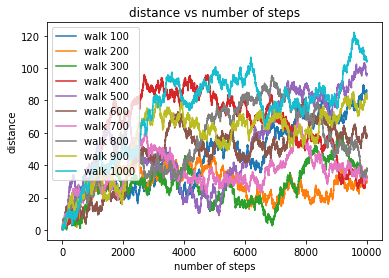

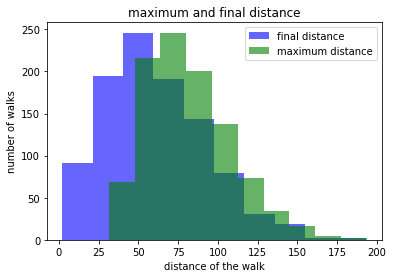

In [22]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

dist = []
maxLen = []
for j in range(1, 1001):
    x = 0
    y = 0
    step = []
    walk = []
    maxDist = 0
    info = 'walk '+str(j)
    for i in range(1, 10001):
        dx = random.randint(0, 2)-0.5
        dy = random.randint(0, 2)-0.5
        x += dx
        y += dy
        if j%100 == 0:
            step.append(i)
            walk.append(np.sqrt(x**2+y**2))
        maxDist = max(maxDist, np.sqrt(x**2+y**2))
    maxLen.append(maxDist)
    dist.append(np.sqrt(x**2+y**2))
    if j%100 == 0:
        plt.plot(step, walk, label = info)
plt.xlabel('number of steps')
plt.ylabel('distance')
plt.title('distance vs number of steps')
plt.legend()
plt.show()

plt.title('maximum and final distance')
plt.xlabel('distance of the walk')
plt.ylabel('number of walks')
plt.hist(dist, bins = 10, color = 'blue', label = 'final distance', alpha = 0.6)
plt.hist(maxLen, bins = 10, color = 'green', label = 'maximum distance', alpha = 0.6)
plt.legend()
plt.show()

### 3.3
Explore the time dependence of the maximum and final distance the random walk gets away from the origin as a function of the number of steps $n$ taken. Each step represents a time step and therfore $n$ represents time. Make $n = 2^p$ steps for cases $p \in [4, 5, \dots ,13]$. These represent cases with random walks of increasing length. Each time make $n_\mathrm{walk} = 1000$  walks to establish good statistics. 
* For each of the 10 cases (one for each $p$) determine the maximum distance $r_\mathrm{max-hist}$ that the walkers get away from the origin. This can be approximated by the distance corresponding to the maximum of the histogram of the maximum distance of the $n_\mathrm{walk}$ walks for each case. Plot $r_\mathrm{max-hist}$ vs. time.
* Likewise determine for each case the average over all random walks of the final distance from the origin, and plot that average as a function of time. 
* Find out if these two data sets (distance vs time) follow a power law or an exponential. For a diffusion process the mean-square-distance or variance is proportional to time. In other words the diffusion length is proportional to $\sqrt{D t}$. Does your data support the notion that the random walk (in the limit of large $n_\mathrm{walk}$) represents a diffusion process ?

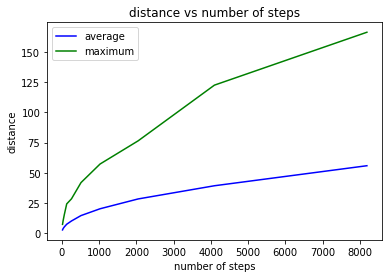

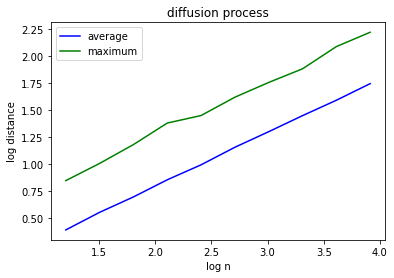

In [25]:
import numpy as np
from scipy import random
import matplotlib.pyplot as plt

p = np.linspace(4, 13, 10)
time = 2**(p)


distTot = []
distMax = []

for i in range(10):
    dist = []
    for j in range(1000):
        x = int(0)
        y = int(0)
        for k in range(1, int(time[i]+1)):
            dx = random.randint(0, 2)-0.5
            dy = random.randint(0, 2)-0.5
            x += dx 
            y += dy
            
        dist.append(np.sqrt(x**2+y**2))
    
    distTot.append(sum(dist)/1000)
    distMax.append(max(dist))

plt.xlabel('number of steps')
plt.ylabel('distance')
plt.title('distance vs number of steps')
plt.plot(time, distTot, color='blue', label = 'average')
plt.plot(time, distMax, color='green', label = 'maximum')
plt.legend()
plt.show()

plt.xlabel('log n')
plt.ylabel('log distance')
plt.title('diffusion process')
plt.plot(np.log10(time), np.log10(distTot), color='blue', label = 'average')
plt.plot(np.log10(time), np.log10(distMax), color='green', label = 'maximum')
plt.legend()
plt.show()

Text answer: In order to check if the random walk represents diffusion process, I need to take the log of both distance and number of steps. By doing that, the exponent 1/2, comes from the square root, is just a constant. And that we can use double logarithmic plot to check if they have a linear relationship or not. If the double logarithmic plot have a linear relationship, it implies that random walk obeys diffusion process.

## Problem 4

 
### 4.1


The starfish-like shape shown in file `trig-circ.png` in Activity 2 of Lab 5.1 consists of a perturbed circle of radius $r(\phi)=1 + dr(\phi)$ where  $dr(\phi)$ is a sine wave with amplitude $0.25$, and as seen in the image 24 periods fit into the $2\pi$ circumference. Write the code that reproduces the image in the file `trig-circ.png` as closely as possible. 

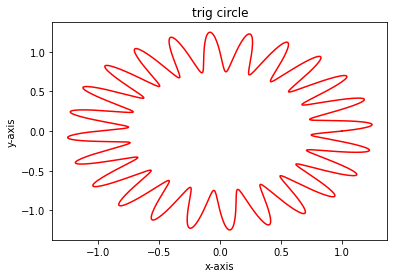

In [33]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 1200)

def dr(theta):
    return 0.25*np.sin(24*theta)

r = 1+dr(theta)
# convert to cartesian
x = np.cos(theta)*r
y = np.sin(theta)*r

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('trig circle')
plt.plot(x, y, color='red')
plt.show()

### 4.2
Write the data of the outline of the shape to the file `trig-circ2.dat` so that the code
```Python
xrad,yrad = loadtxt('trig-circ2.dat',unpack=True)
ifig=1;close(ifig);figure(ifig)
plot(xrad,yrad,'-r')
```
produces the plot ![trig-circ2](trig-circ2.png)

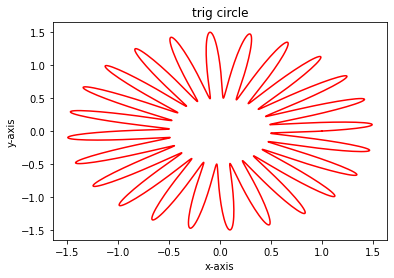

In [35]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 1200)

def dr(theta):
    return 0.5*np.sin(24*theta)

r = 1+dr(theta)
    
x = np.cos(theta)*r
y = np.sin(theta)*r

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('trig circle')
plt.plot(x, y, color='red')
plt.show()

## 4.3

Using the Monte Carlo method with 1000 samples determine the area covered by the new shape (for the case where the amplitude of the radius perturbation is 0.5 instead of 0.25 as in Lab 5.1), with all other parameters the same. (If you did not complete solution of 4.1 use the data in file 'trig-circ.dat' again from Lab 5.1.)


In [28]:
import numpy as np
from scipy import random

theta = np.linspace(0, 2*np.pi, 1200)

def dr(theta):
    return 0.5*np.sin(24*theta)

r = 1+dr(theta)
    
x = np.cos(theta)*r
y = np.sin(theta)*r
theta2 = np.arctan(y/x)

rng = random.default_rng()

xrand, yrand = 3*rng.random((2, 1000))-1.5
count = 0
total = 0

for i in range(1000):
    closest = abs(theta[0]-theta2[i])
    ind = 0
    #find the closest angle theta difference
    for j in range(len(theta2)):
        if abs(theta[j]-theta2[i]) < closest:
            closest = abs(theta[j]-theta2[i])
            ind = j
    #count the points under the curve
    start_theta = min(theta[ind], theta2[i])
    end_theta = max(theta[ind], theta2[i])
    for k in range(1000):
        if theta2[k]>=start_theta and theta2[k]<=end_theta:
            total+=1
            if (xrand[k]**2+yrand[k]**2)<=(x[ind]**2+y[ind]**2):
                count+=1
                
print('area: {}'.format(9*(count/total)))

area: 3.1163618509880937
